## <i> <span style='color:red'>SVM-FOREST FIRES DATA</i></span>

### PROBLEM STATMENT: Classify the Size_Categorie of the forest fire area, using SVM

### Import libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings("ignore")

### Reading the csv file

In [2]:
df = pd.read_csv('forestfires.csv')
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### understanding the the data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
# Dropping the columns that are already one hot encoded from the original data, since it just increases the dimesion of the data
df1 = df.drop(df.columns[11:30], axis = 1  )

In [5]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


### Histplot- To check whether it is normally distributed or not

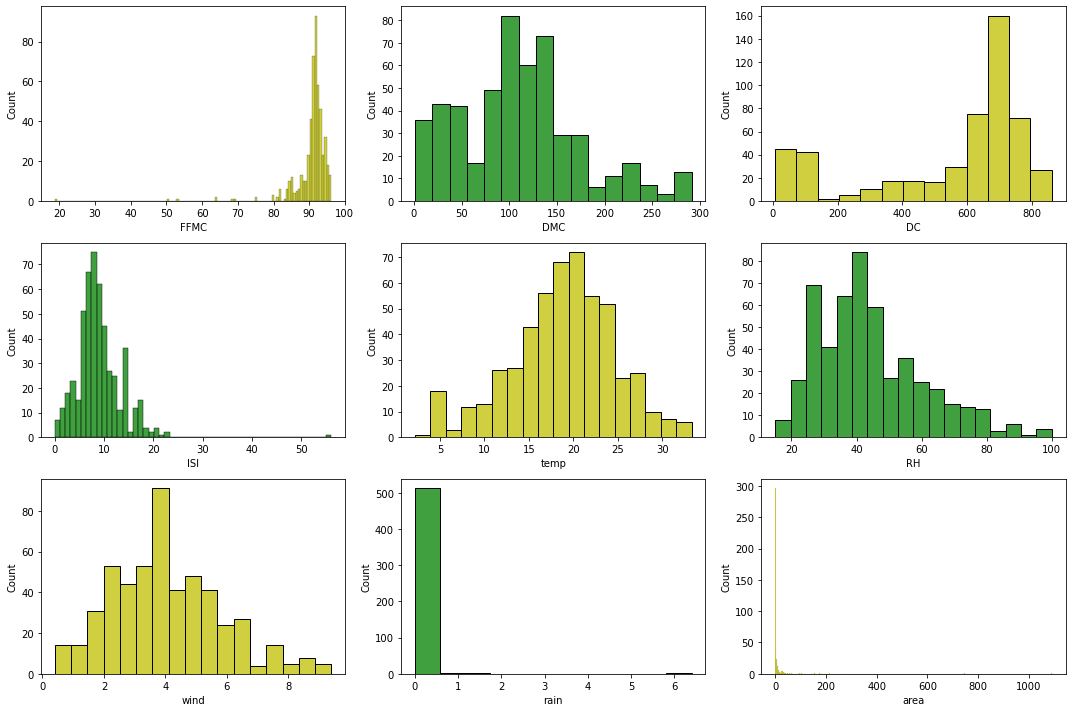

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.histplot(df1.FFMC, ax=ax[0,0],color='y')
sns.histplot(df1.DMC, ax=ax[0,1],color='g')
sns.histplot(df1.DC, ax=ax[0,2],color='y')
sns.histplot(df1.ISI, ax=ax[1,0],color='g')
sns.histplot(df1.temp, ax=ax[1,1],color='y')
sns.histplot(df1.RH, ax=ax[1,2],color='g')
sns.histplot(df1.wind, ax=ax[2,0],color='y')
sns.histplot(df1.rain, ax=ax[2,1],color='g')
sns.histplot(df1.area, ax=ax[2,2],color='y')

plt.tight_layout()
plt.show()

### Boxplot-To check the outliers

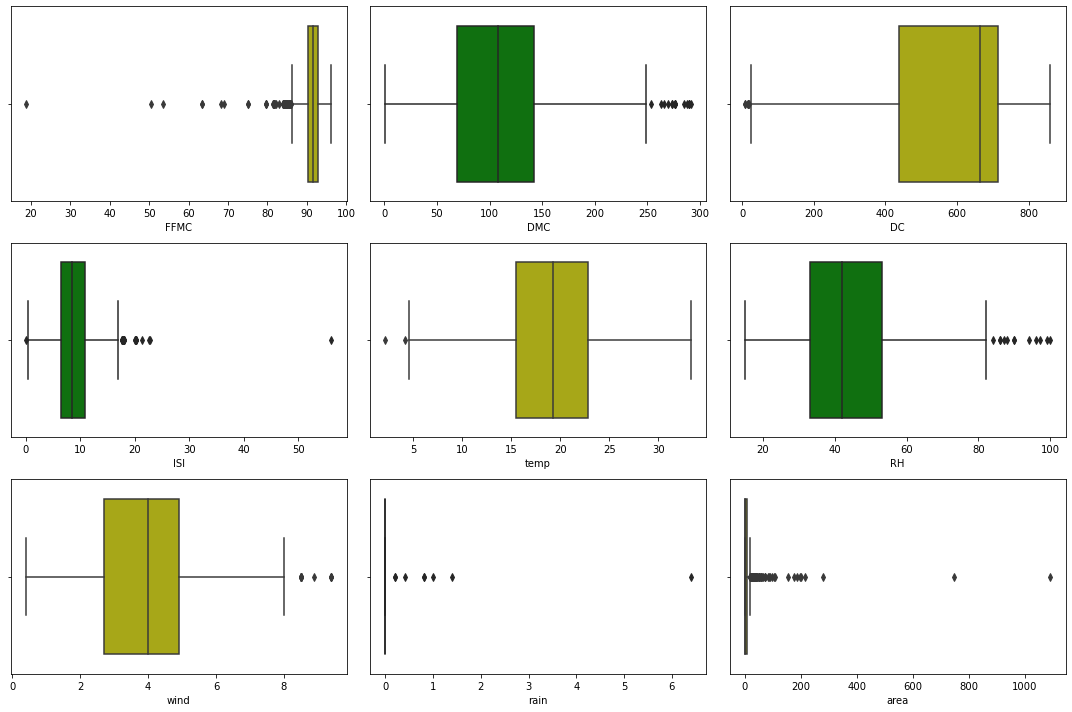

In [7]:
fig, ax = plt.subplots(3, 3, figsize=(15,10))

sns.boxplot(df1.FFMC, ax=ax[0,0],color='y')
sns.boxplot(df1.DMC, ax=ax[0,1],color='g')
sns.boxplot(df1.DC, ax=ax[0,2],color='y')
sns.boxplot(df1.ISI, ax=ax[1,0],color='g')
sns.boxplot(df1.temp, ax=ax[1,1],color='y')
sns.boxplot(df1.RH, ax=ax[1,2],color='g')
sns.boxplot(df1.wind, ax=ax[2,0],color='y')
sns.boxplot(df1.rain, ax=ax[2,1],color='g')
sns.boxplot(df1.area, ax=ax[2,2],color='y')


plt.tight_layout()
plt.show()

### Label conding-To convert categorical variables into numerical

In [8]:
label_encoder=preprocessing.LabelEncoder()
df1["size_category"]=label_encoder.fit_transform(df1["size_category"])

In [9]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [10]:
df1.month.replace(("jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"),(1,2,3,4,5,6,7,8,9,10,11,12), inplace = True )
df1.day.replace(("mon","tue","wed","thu","fri","sat","sun"),(1,2,3,4,5,6,7), inplace = True )

In [11]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int32  
dtypes: float64(8), int32(1), int64(3)
memory usage: 46.6 KB


In [13]:
# Splitting independent and dependent variables from the new dataset
X = df1.iloc[:,0:11].values
Y = df1.iloc[:,-1].values

In [14]:
# Splitting the dataset into training and test dataset
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.30, random_state=30)  

In [15]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((361, 11), (361,), (156, 11), (156,))

### Grid Search CV-To Construct an SVM model with the best values 

In [16]:
clf1 = SVC()
param_grid1 = [{'kernel':['rbf'],'gamma':[50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv1 = GridSearchCV(clf1,param_grid1,cv=10)
gsv1.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['rbf']}])

In [17]:
gsv1.best_params_ , gsv1.best_score_ 

({'C': 15, 'gamma': 0.05, 'kernel': 'rbf'}, 0.7451201201201202)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV

In [18]:
clf1 = SVC(C= 15, gamma = 0.05,kernel='rbf')
clf1.fit(X_train , Y_train)
y_pred = clf1.predict(X_test)
acc1 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc1)
confusion_matrix(Y_test, y_pred)

Accuracy = 74.35897435897436


array([[  3,  39],
       [  1, 113]], dtype=int64)

### Constructing a SVM model with Kernel as polynomial and running it on the grid search to identify the best values with different gamma and C values

In [19]:
clf2 = SVC()
param_grid2 = [{'kernel':['poly'],'gamma':[50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv2 = GridSearchCV(clf2,param_grid2,cv=10)
gsv2.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['poly']}])

In [20]:
gsv2.best_params_ , gsv2.best_score_ 

({'C': 15, 'gamma': 50, 'kernel': 'poly'}, 0.9722222222222221)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV with polynomial kernel 

In [22]:
clf2 = SVC(C= 15, gamma = 50, kernel = "poly")
clf2.fit(X_train , Y_train)
y_pred = clf2.predict(X_test)
acc2 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc2)
confusion_matrix(Y_test, y_pred)

Accuracy = 96.15384615384616


array([[ 39,   3],
       [  3, 111]], dtype=int64)

### Constructing a SVM model with Kernel as Sigmoid and running it on the grid search to identify the best values with different gamma and C values

In [24]:
clf3 = SVC()
param_grid3 = [{'kernel':['sigmoid'],'gamma':[30,50,5,0.5,0.2,0.1,0.05],'C':[15,14,20,30,35,48,12,16,29] }]
gsv3 = GridSearchCV(clf3,param_grid3,cv=10)
gsv3.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 20, 30, 35, 48, 12, 16, 29],
                          'gamma': [30, 50, 5, 0.5, 0.2, 0.1, 0.05],
                          'kernel': ['sigmoid']}])

In [25]:
gsv3.best_params_ , gsv3.best_score_

({'C': 15, 'gamma': 30, 'kernel': 'sigmoid'}, 0.7313063063063063)

### Constructing an SVM model with the best values that is obtained from the above Gridsearch CV with sigmoid kernel 

In [26]:
clf3 = SVC(C= 15, gamma = 30, kernel = "sigmoid")
clf3.fit(X_train , Y_train)
y_pred = clf3.predict(X_test)
acc3 = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc3)
confusion_matrix(Y_test, y_pred)

Accuracy = 73.07692307692307


array([[  0,  42],
       [  0, 114]], dtype=int64)

In [27]:
t={'model':['rbf','poly','sigmoid'],
  'score':[acc1,acc2,acc3]
  }
t=pd.DataFrame(t)
t

,model,score
0,rbf,74.358974
1,poly,96.153846
2,sigmoid,73.076923


## Inference:

### From the accuracy score its clear that polynomial svm is having the best score among them.So for classification of forest area polynomial kernel is best with high score 96.15%